In [289]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [290]:
df=pd.read_excel('premiums.xlsx')

## Reading input sheet 

In [291]:
df.head(3)

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164


##### Seeing the number of rows and columns

In [292]:
df.shape

(50000, 13)

In [293]:
df.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

# Bringing uniformity in column names

In [294]:
type(df.columns)

pandas.core.indexes.base.Index

In [295]:
#since the df columns are padas object , converting them in str , to apply str opperations
df.columns=df.columns.str.replace(" ","_").str.lower()

df.head(1)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053


# Handle Null Values if Any

seeing NA or NULL values in each column

In [296]:
df.isna().sum() #df.isnull().sum() will also result same

age                       0
gender                    0
region                    0
marital_status            0
number_of_dependants      0
bmi_category              0
smoking_status           11
employment_status         2
income_level             13
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [297]:
#dropping all rows containing null values, as they are not many
#inplace=true >> modifies the same df
df.dropna(inplace=True)

In [298]:
df.isna().sum()  #checking df after dropping na

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

# Drop Duplicates if any

In [299]:
df.duplicated().sum() #checks the number of duplicatte rows if aNY
df.drop_duplicates(inplace=True) #drops duplicates
df.duplicated().sum() #check again

np.int64(0)

In [300]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


In [301]:
#checking the counts of negative numbers in nuber of dependents col

df[df.number_of_dependants<0].shape

(72, 13)

In [302]:
df[df.number_of_dependants<0]

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
402,23,Female,Southwest,Unmarried,-3,Underweight,No Smoking,Freelancer,10L - 25L,18,No Disease,Silver,9309
2245,18,Male,Southwest,Unmarried,-3,Overweight,No Smoking,Freelancer,25L - 40L,28,No Disease,Silver,8095
2323,19,Male,Northwest,Unmarried,-3,Underweight,No Smoking,Freelancer,25L - 40L,40,No Disease,Bronze,4641
2986,34,Female,Southeast,Married,-1,Underweight,Regular,Self-Employed,25L - 40L,35,High blood pressure & Heart disease,Silver,22995
3756,41,Male,Southwest,Married,-1,Obesity,Regular,Salaried,10L - 25L,21,Diabetes,Silver,22766
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48062,23,Male,Northwest,Unmarried,-1,Normal,No Smoking,Freelancer,> 40L,54,No Disease,Gold,13601
48086,36,Female,Southwest,Married,-1,Obesity,Occasional,Salaried,<10L,3,Diabetes,Bronze,14422
49256,60,Female,Southwest,Married,-1,Normal,No Smoking,Self-Employed,10L - 25L,21,Thyroid,Bronze,10141
49270,34,Male,Southeast,Married,-1,Obesity,No Smoking,Self-Employed,10L - 25L,17,Diabetes & Thyroid,Silver,21816


In [303]:
#what age values they contain ,
type(df[df.number_of_dependants<0])

df[df.number_of_dependants<0]["number_of_dependants"]

402     -3
2245    -3
2323    -3
2986    -1
3756    -1
        ..
48062   -1
48086   -1
49256   -1
49270   -1
49523   -1
Name: number_of_dependants, Length: 72, dtype: int64

In [304]:
df[df.number_of_dependants<0]["number_of_dependants"].unique()

#so, -3 and -1 are the number of dep values in about 72 rows, we can turn all them to positives 
#thinking that those were +3 and +1, but mistakenly given in negatives 

array([-3, -1])

In [305]:
df.number_of_dependants=df.number_of_dependants.abs() # Converting neagtive ages to positive ages

In [306]:
df.number_of_dependants.unique()

array([0, 2, 3, 4, 1, 5])

# Plotting Box plot to view outliers for all numeric columns

In [307]:
# if df has too many numeric columns , we can use below line to get all columns having numeric or float values

numeric_columns=df.select_dtypes(["int64","float64"]).columns

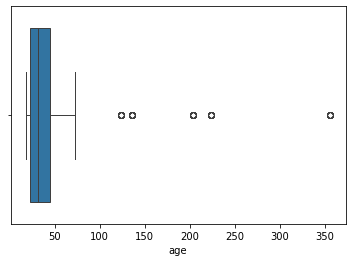

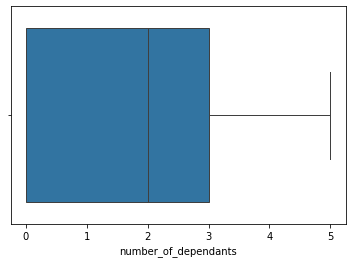

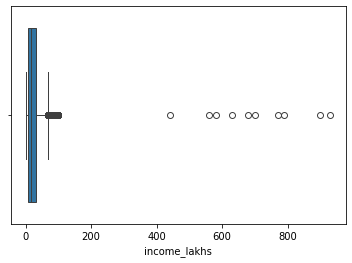

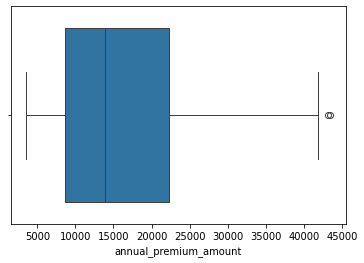

In [308]:
for col in numeric_columns:
    sns.boxplot(x=df[col])
    plt.show()

In [309]:
#treating Age column  by removing ages beyond 100

In [310]:
df1=df[df.age<100]

In [311]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49918.000000,49918.000000,49918.000000,49918.000000
mean,34.401839,1.717617,23.025141,15766.589286
std,13.681600,1.492074,24.227912,8419.137327
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22272.000000
max,72.000000,5.000000,930.000000,43471.000000


# Outlier removal in income column using IQR method

In [312]:
q1=df1.income_lakhs.quantile(0.25)
q1

q2=df1.income_lakhs.quantile(0.75)
q2


np.float64(31.0)

In [313]:
IQR=q2-q1
IQR

np.float64(24.0)

In [314]:
#this cab be done or we can simply use other quantile straightly and drop the ones which are not within that quantile
# df2=df1[(df1.income_lakhs>q1-1.5*IQR) & (df1.income_lakhs<q2+IQR)]

max_limit=df1.income_lakhs.quantile(.999)  #its gives 100 lackhs as the quantile limit/ .999 is jsut an experimented one, to get 
#100 lakhs as the sensible limit in income , you can change the number to experiment./ so , we will limit the income to max 100

In [315]:
df2=df1[df1.income_lakhs<=max_limit]

In [316]:
df2.income_lakhs.describe()

count    49908.000000
mean        22.889897
std         22.170699
min          1.000000
25%          7.000000
50%         17.000000
75%         31.000000
max        100.000000
Name: income_lakhs, dtype: float64

# Plotting Histogram now to know the distribution pattern of the data

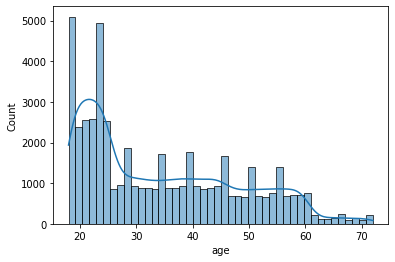

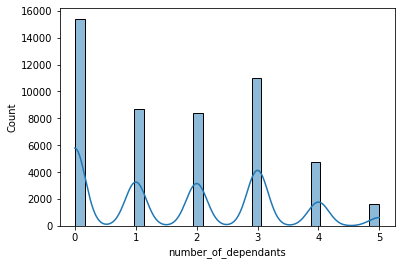

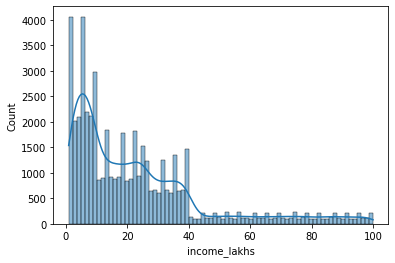

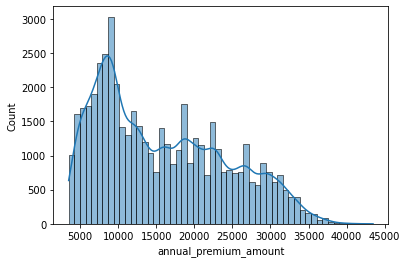

In [317]:
for col in numeric_columns:
    sns.histplot(df2[col] , kde=True)
    plt.show()
    

In [318]:
#Above histograms show the Univariate analaysis, i.e only one variable is seen visually, but there can be more than one variable
#creating a plot , which is called BiVariate analsysis, for which we can use scatterplot//

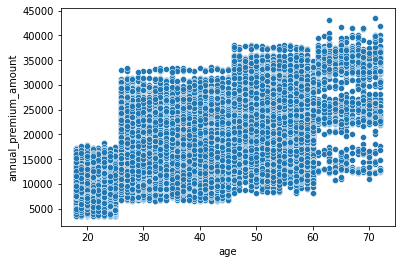

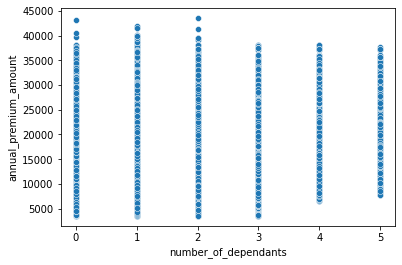

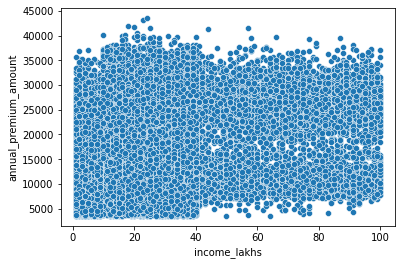

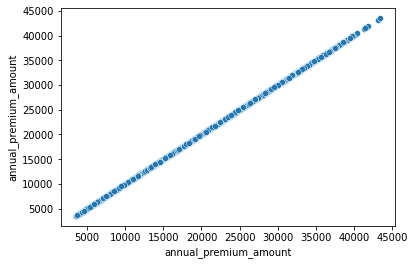

In [319]:
for col in numeric_columns:
    sns.scatterplot(df2,x=df2[col],y='annual_premium_amount')
    plt.show()

In [320]:
# there isnt much in above pictures, so we move our EDA into non numerical columns/


In [321]:
df2.dtypes

age                       int64
gender                   object
region                   object
marital_status           object
number_of_dependants      int64
bmi_category             object
smoking_status           object
employment_status        object
income_level             object
income_lakhs              int64
medical_history          object
insurance_plan           object
annual_premium_amount     int64
dtype: object

In [322]:
#Correcting the non uniformity in values of column

df2['smoking_status'].replace(
    {
        'Smoking=0':'No Smoking',
        'Does Not Smoke':'No Smoking',
        'Not Smoking':'No Smoking'
    }
    , inplace=True
)

df2['smoking_status'].unique()

C:\Users\kulka\AppData\Local\Temp\ipykernel_3764\1222788578.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace(
C:\Users\kulka\AppData\Local\Temp\ipykernel_3764\1222788578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['smoking_status'].replace(


array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

In [323]:
#in above list selecting only object

df3=df2.select_dtypes(['object'])

In [324]:
#kKnwoing count or percentage of male and female in gender

df3.gender.value_counts()

gender
Male      27431
Female    22477
Name: count, dtype: int64

In [325]:
# if we need in percentages then

gender_count_percentage=df3.gender.value_counts(normalize=True)

# bar plotting

In [326]:
ind=gender_count_percentage.index

In [327]:
val=gender_count_percentage.values

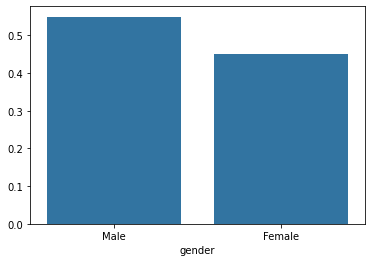

In [328]:
sns.barplot(x=ind,y=val)
plt.show()

In [329]:
# Crosstab plotting for bivariate analysus , like seeing which insurance plan is bought by which incomelevel people
# i.e plotting bar chart FOR MULITVARIATE ANALYSIS  

crosstab_details=pd.crosstab(df2['income_level'],df2['insurance_plan'])
print(crosstab_details)

insurance_plan  Bronze  Gold  Silver
income_level                        
10L - 25L         5307  3880    5182
25L - 40L         3683  2840    3750
<10L             12226   931    5486
> 40L              329  3653    2641


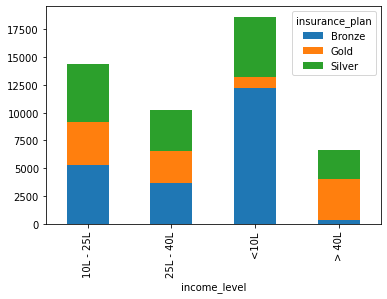

In [330]:
#in above crosstab table, we see the GOld plan is most bought by20-35 income peoplel

# To have such visualization , we plot the bar chart with crosstab 

crosstab_details.plot(kind='bar',stacked=True)  #,stacked=True puts all sections in one bar , making it look like a multicaolor bar
plt.show()

# Heatmap

<Axes: xlabel='insurance_plan', ylabel='income_level'>

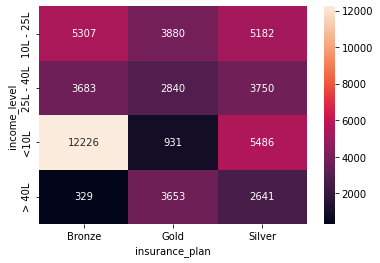

In [331]:
sns.heatmap(crosstab_details,annot=True,fmt='d')

## Feature Engineering

In [332]:
#Now we address the columns whos values are in text forms

In [333]:
df2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [334]:
#list of diseases and its risk scores given by business company for our use
risk_scores={
    "diabetes":6,"heart disease":8,"high blood pressure":6,"thyroid":5,"no disease":0,"none":0
}

In [335]:
df2[['disease1','disease2']]=df2['medical_history'].str.split(" & ", expand=True).apply(lambda x:x.str.lower()).copy()

# We have to assign the scores or numbers to each of disease, as ML model only understands numbers and not text.
#Some medical history have more than one disease combined with & , so we split it using str.split(" & ")
#df3['medical_history'].str.split(" & ") >> gives a Series which we dont want
# SO expand= True makes it a dataframe.

#.apply(lambda x:x.str.lower()) >> makes all values to lower case

#df3[['disease1','disease2']]  on equating to this, this will give out two columns as disease1 and disease2 in our df3

C:\Users\kulka\AppData\Local\Temp\ipykernel_3764\1471267251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['disease1','disease2']]=df2['medical_history'].str.split(" & ", expand=True).apply(lambda x:x.str.lower()).copy()
C:\Users\kulka\AppData\Local\Temp\ipykernel_3764\1471267251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[['disease1','disease2']]=df2['medical_history'].str.split(" & ", expand=True).apply(lambda x:x.str.lower()).copy()


In [336]:
df2.sample(5)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
33909,28,Male,Southwest,Unmarried,0,Normal,Occasional,Self-Employed,> 40L,77,Diabetes & High blood pressure,Gold,24963,diabetes,high blood pressure
37678,23,Male,Southeast,Married,3,Underweight,Regular,Freelancer,25L - 40L,29,Diabetes,Bronze,8592,diabetes,None
22194,27,Male,Northeast,Married,3,Normal,Regular,Salaried,> 40L,42,No Disease,Gold,22864,no disease,None
17840,23,Female,Northeast,Unmarried,1,Normal,No Smoking,Salaried,<10L,6,No Disease,Bronze,8238,no disease,None
29775,43,Female,Southwest,Married,4,Normal,Occasional,Salaried,25L - 40L,27,High blood pressure & Heart disease,Silver,20535,high blood pressure,heart disease


In [337]:
#removing any NA values

df2['disease1'].fillna('none',inplace=True)
df2['disease2'].fillna('none',inplace=True)

df2['disease1']=df2['disease1'].map(risk_scores)
df2['disease2']=df2['disease2'].map(risk_scores)
df2['total_risk_score']=df2['disease1']+df2['disease2']

C:\Users\kulka\AppData\Local\Temp\ipykernel_3764\1299370983.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['disease1'].fillna('none',inplace=True)
C:\Users\kulka\AppData\Local\Temp\ipykernel_3764\1299370983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['disease1'].fillna('none',inplace=True)
C:\Users\kulka\AppData\Local\Temp

In [338]:
df3.sample(5)

,gender,region,marital_status,bmi_category,smoking_status,employment_status,income_level,medical_history,insurance_plan
37149,Female,Southwest,Unmarried,Normal,No Smoking,Freelancer,10L - 25L,Diabetes,Bronze
44260,Male,Southeast,Married,Overweight,Regular,Freelancer,25L - 40L,Thyroid,Silver
20666,Male,Southeast,Married,Overweight,Occasional,Self-Employed,25L - 40L,Diabetes,Silver
36344,Male,Southeast,Married,Obesity,Occasional,Salaried,25L - 40L,High blood pressure,Gold
2124,Male,Northwest,Married,Obesity,Regular,Salaried,10L - 25L,High blood pressure,Gold


In [339]:
# SO, NOW MEDICAL HISTORY IS MADE in NUmeric INFO

In [340]:
# NOw normalize the totalscore , i.e getting number bettwen 0 and 1 scale
#i.e scaling all numbers between 0 to 1 range

max=df2.total_risk_score.max()
min=df2.total_risk_score.min()

df2['normalized_score']=(df2.total_risk_score - min) / (max-min)

C:\Users\kulka\AppData\Local\Temp\ipykernel_3764\1509577109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['normalized_score']=(df2.total_risk_score - min) / (max-min)


In [341]:
df2.sample(4)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_score
18336,22,Male,Southeast,Unmarried,1,Underweight,No Smoking,Freelancer,10L - 25L,17,No Disease,Bronze,8350,0,0,0,0.000000
41027,31,Female,Southeast,Unmarried,0,Normal,Occasional,Salaried,<10L,8,No Disease,Bronze,8124,0,0,0,0.000000
27185,21,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,1,No Disease,Bronze,5298,0,0,0,0.000000
3569,57,Male,Southeast,Married,4,Overweight,Regular,Salaried,25L - 40L,40,Thyroid,Gold,31762,5,0,5,0.357143


In [342]:
df2.insurance_plan.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

In [343]:
#now handling this insurance plan col
df2['insurance_plan']=df2['insurance_plan'].map({"Bronze":1,"Silver":2,"Gold":3})
df2.sample(3)

C:\Users\kulka\AppData\Local\Temp\ipykernel_3764\909566133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['insurance_plan']=df2['insurance_plan'].map({"Bronze":1,"Silver":2,"Gold":3})


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_score
36605,47,Female,Southwest,Married,2,Normal,No Smoking,Salaried,> 40L,99,Thyroid,3,26973,5,0,5,0.357143
41820,35,Female,Southeast,Married,3,Normal,Occasional,Salaried,> 40L,43,Diabetes,3,22843,6,0,6,0.428571
1858,26,Female,Northwest,Married,2,Normal,No Smoking,Salaried,25L - 40L,29,High blood pressure,2,16132,6,0,6,0.428571


In [344]:
df2=df2.drop(["total_risk_score",'disease1','disease2','medical_history'],axis="columns")

In [345]:
df2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_score
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,1,9053,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,1,16339,0.428571


In [346]:
# handling income level col into pure numbers

levels=df2.income_level.unique()
levels

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [347]:
# handling income level col into pure numbers

df2['income_level']=df2.income_level.map({'<10L':1,'10L - 25L':2,'25L - 40L':3, '> 40L':4})

df2.sample(3)

In [348]:
#now addressing the cols which have nominal data , ie data which are not of any order or ranks like we had for 
#bronze , silver, gold... etc

nominal_cols=df2.select_dtypes('object').columns
nominal_cols

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status'],
      dtype='object')

In [349]:
# So using one hot encoding for these nominal cols

df2=pd.get_dummies(df2,columns=nominal_cols,drop_first=True,dtype=int) #drop_first=True>> is very IMP, else in VIF scores we
#might end up seeing infinity as value to many columns . 
# this drop_first=True , drops the redundant dummy of the col, ex: for Gender col, there are two dummies (gender_male,gender_female)
# if gender_male is '1' , then it certainly means that i dont need info from gender_female, or vice versa, as keeping both 
# is simply redundant. And if this redundancy is not removed, we get 'inf' value when we calculate VIF score

#below two lines removes the wrapping of the output table
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)
df2.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,2,13365,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


In [350]:
#Since all of the columns now have a numeric data which model can understand, now we try to find the coorelation
#factor between the columns, to select the appropriate cols for model training, bcos not all cols contribute meanifully to
#determine the annual premium price....

# Coorelation matrix

In [351]:
cm=df2.corr()

In [352]:
cm

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
age,1.000000,0.415742,0.029851,0.025060,0.496317,0.767569,0.442773,-0.002219,0.000464,0.003305,-0.003424,-0.543104,0.152496,0.153148,-0.115888,0.066596,0.059380,-0.008093,0.314684
number_of_dependants,0.415742,1.000000,0.006564,0.006074,0.256459,0.414691,0.371498,-0.003093,0.001693,0.003620,-0.000339,-0.841717,0.115397,0.110451,-0.093881,0.071762,0.094829,0.067066,0.115930
income_level,0.029851,0.006564,1.000000,0.906830,0.440428,0.271811,0.013506,0.063108,-0.003324,-0.000259,0.009367,-0.012994,-0.002244,0.007947,0.000350,-0.001340,0.020275,-0.134032,0.139333
income_lakhs,0.025060,0.006074,0.906830,1.000000,0.410753,0.243058,0.009626,0.039126,-0.005192,-0.001250,0.009929,-0.011099,0.000314,0.007150,-0.000740,0.002306,0.010948,-0.100510,0.109759
insurance_plan,0.496317,0.256459,0.440428,0.410753,1.000000,0.834148,0.260932,0.034211,-0.002821,0.004082,-0.000977,-0.316800,0.094698,0.098639,-0.073881,0.037351,0.059587,-0.041582,0.223947
annual_premium_amount,0.767569,0.414691,0.271811,0.243058,0.834148,1.000000,0.519458,0.064470,-0.005078,0.008235,-0.003828,-0.516350,0.249847,0.187103,-0.135289,0.060610,0.198829,-0.005442,0.289438
normalized_score,0.442773,0.371498,0.013506,0.009626,0.260932,0.519458,1.000000,-0.003754,-0.005627,0.002019,-0.000132,-0.433916,0.101039,0.102556,-0.087996,0.071090,0.093822,0.059511,0.135824
gender_Male,-0.002219,-0.003093,0.063108,0.039126,0.034211,0.064470,-0.003754,1.000000,-0.003287,-0.002988,0.001873,0.003944,-0.031351,0.080588,-0.043000,-0.045618,0.305180,0.005559,0.001055
region_Northwest,0.000464,0.001693,-0.003324,-0.005192,-0.002821,-0.005078,-0.005627,-0.003287,1.000000,-0.368277,-0.330654,-0.001083,-0.002262,0.001194,-0.002017,-0.000669,-0.000255,0.004574,0.000110
region_Southeast,0.003305,0.003620,-0.000259,-0.001250,0.004082,0.008235,0.002019,-0.002988,-0.368277,1.000000,-0.484271,-0.003980,0.006373,0.002511,0.000211,-0.002191,-0.000401,-0.006575,0.003287


<function matplotlib.pyplot.show(close=None, block=None)>

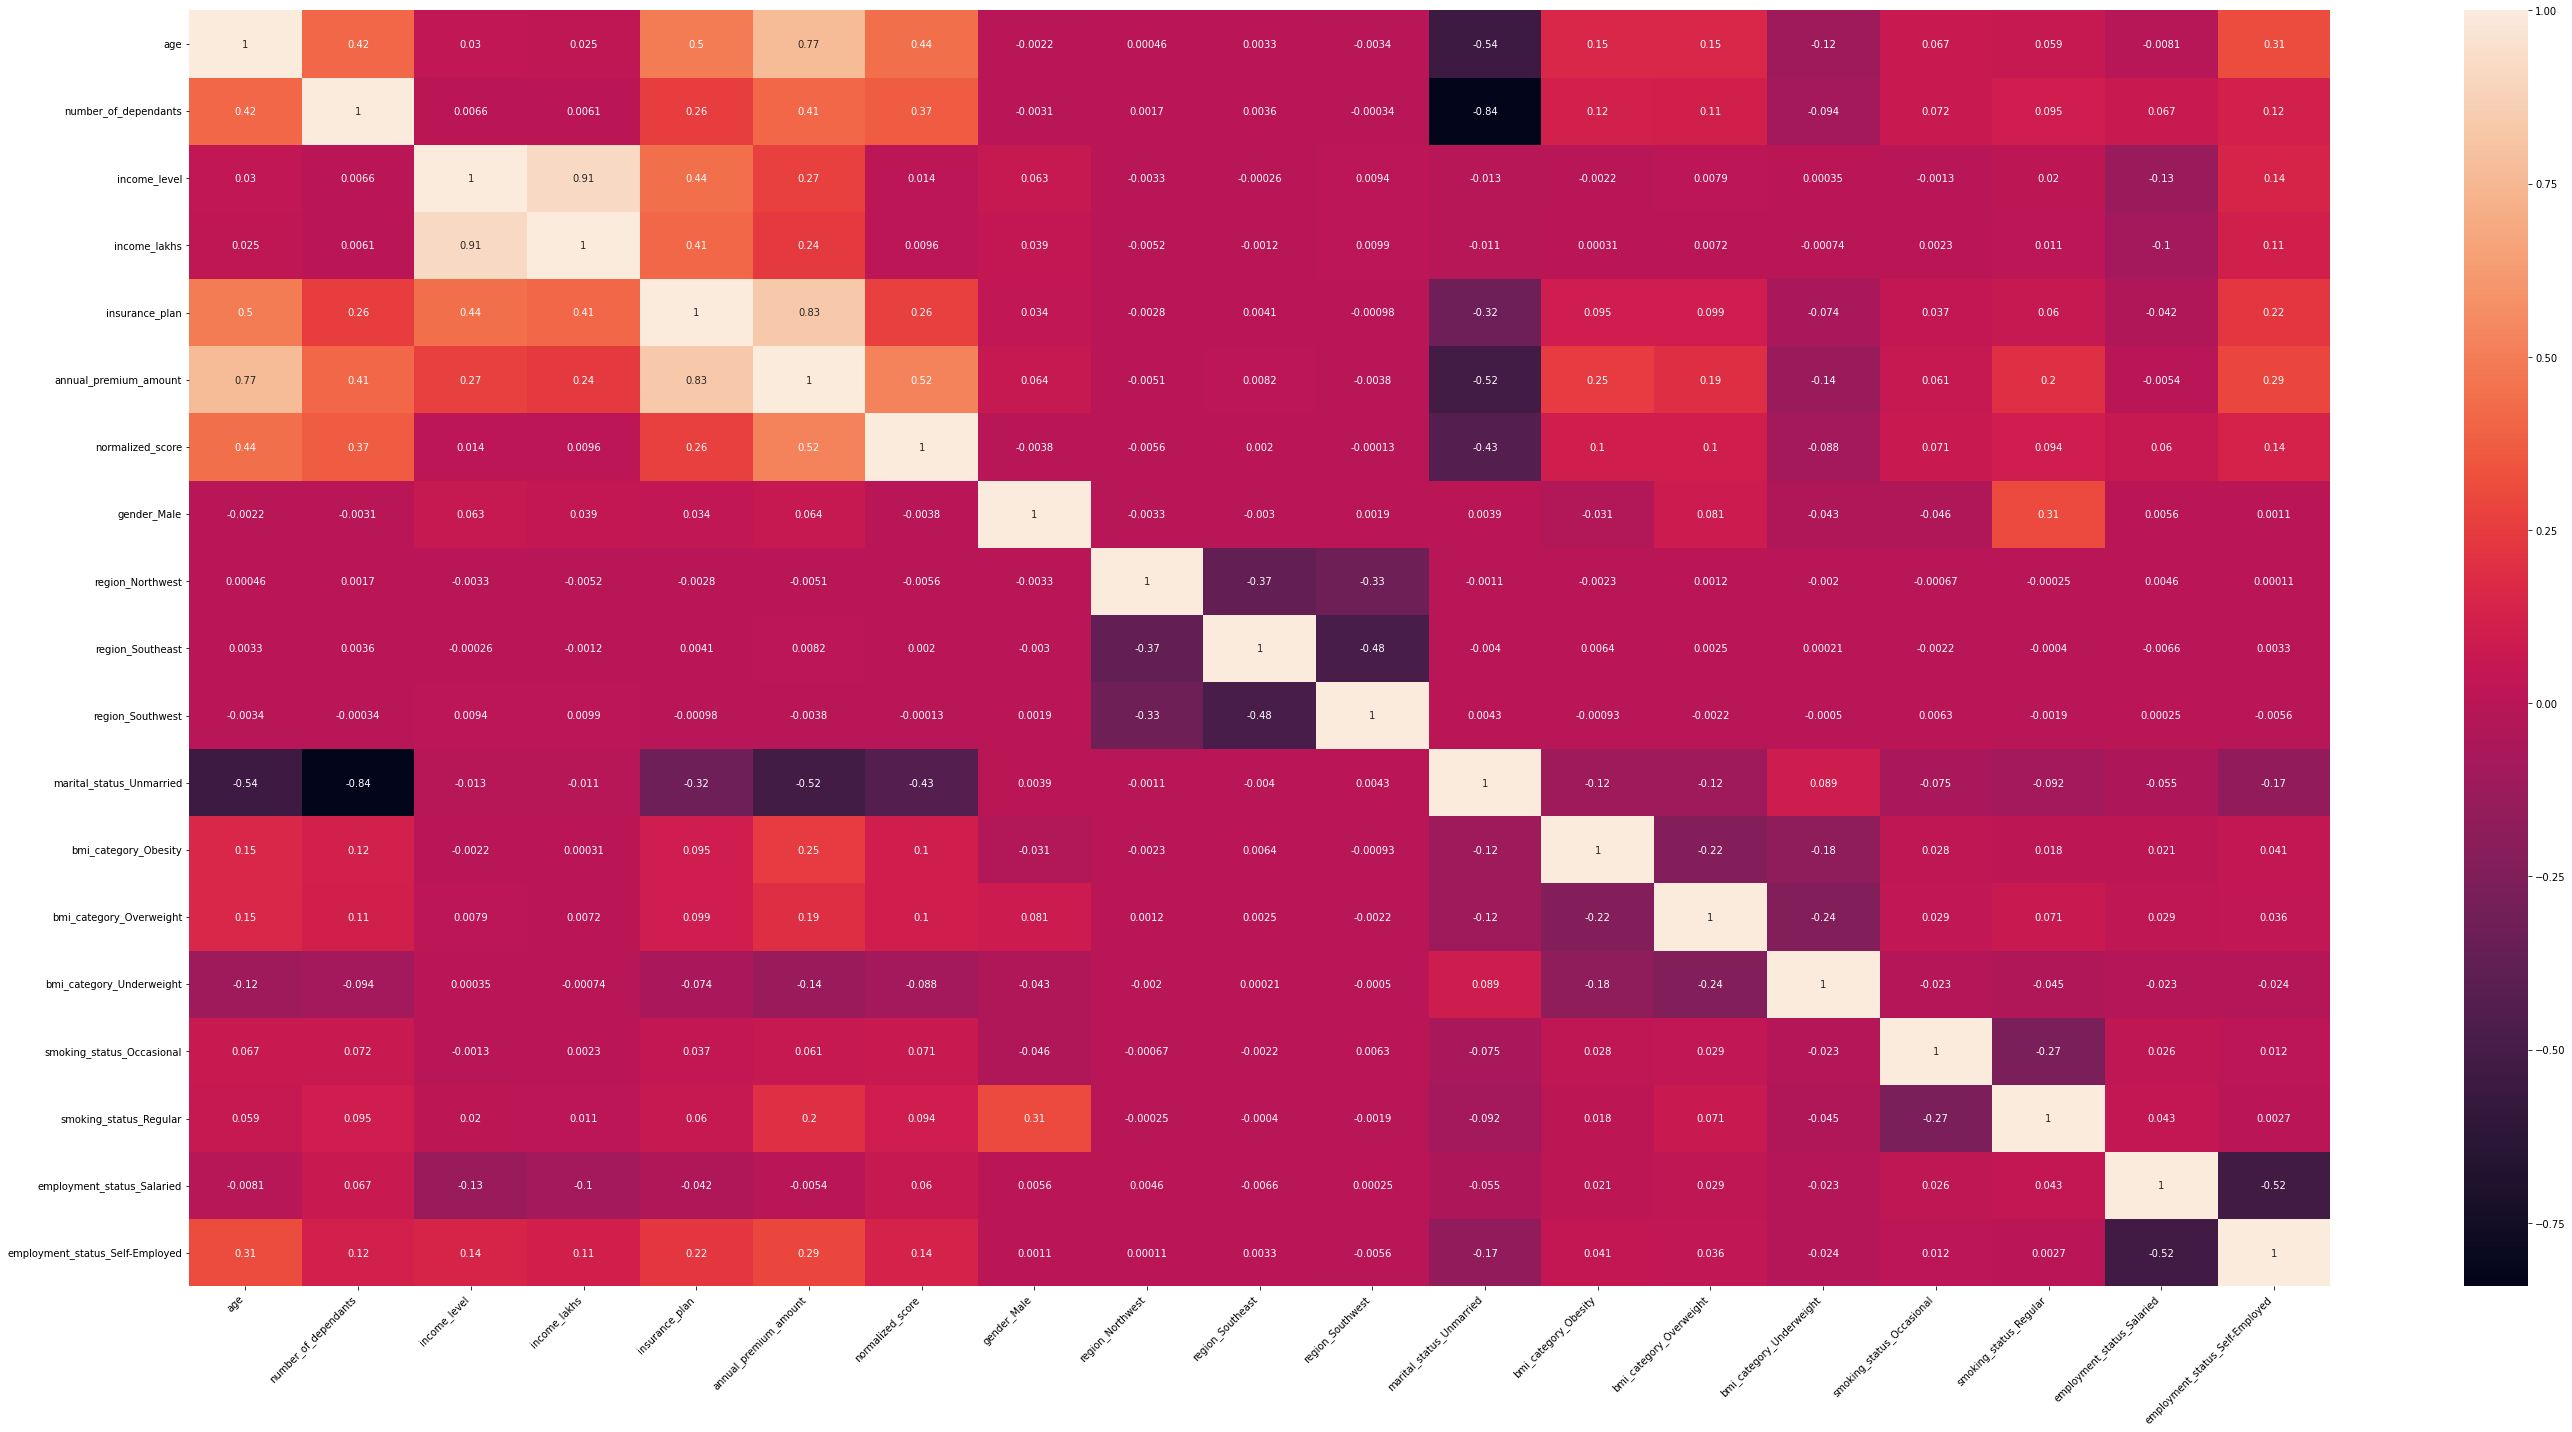

In [353]:
# Need to plot the above usnig heatmap for visualization.

plt.figure(figsize=(40,20))
sns.heatmap(cm,annot=True)
plt.xticks(rotation=45,ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show



In [354]:
df2.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'normalized_score',
       'gender_Male', 'region_Northwest', 'region_Southeast',
       'region_Southwest', 'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

# Separating the target column and training columns 

In [355]:
#target column
y=df2['annual_premium_amount']

#training columns without the target column
X=df2.drop('annual_premium_amount',axis='columns')

In [356]:
X.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,2,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


In [357]:
y

0         9053
1        16339
2        18164
3        20303
4        13365
         ...  
49995     9111
49996    27076
49997     8564
49998     9490
49999    19730
Name: annual_premium_amount, Length: 49908, dtype: int64

In [358]:
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.00000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000
mean,34.401579,1.717640,2.097700,22.889897,1.794802,0.291831,0.549631,0.20093,0.350385,0.303038,0.513545,0.143183,0.231245,0.155326,0.138274,0.313857,0.419412,0.272041
std,13.681604,1.492032,1.049133,22.170699,0.784919,0.287420,0.497536,0.40070,0.477095,0.459576,0.499822,0.350263,0.421633,0.362219,0.345191,0.464064,0.493468,0.445015
min,18.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,1.000000,7.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,2.000000,2.000000,17.000000,2.000000,0.357143,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,45.000000,3.000000,3.000000,31.000000,2.000000,0.428571,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,72.000000,5.000000,4.000000,100.000000,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [359]:
#if you see the table , in max row.. some values are still not scaled between o and 1,  ex: age , income_lakhs col is 100 lakhs , so its better
#to scale all numeric cols between 0 and 1 , hence using MinMaxScalar.

from sklearn.preprocessing import MinMaxScaler
cols_to_scale=['age','number_of_dependants','income_level','income_lakhs','insurance_plan']
#all these cols i wish to scale their values between 0 to 1

#creating object of MinMaxScaler
scaler=MinMaxScaler()

X[cols_to_scale]=scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.00000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000
mean,0.303733,0.343528,0.365900,0.221110,0.397401,0.291831,0.549631,0.20093,0.350385,0.303038,0.513545,0.143183,0.231245,0.155326,0.138274,0.313857,0.419412,0.272041
std,0.253363,0.298406,0.349711,0.223946,0.392459,0.287420,0.497536,0.40070,0.477095,0.459576,0.499822,0.350263,0.421633,0.362219,0.345191,0.464064,0.493468,0.445015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.000000,0.000000,0.060606,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240741,0.400000,0.333333,0.161616,0.500000,0.357143,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.600000,0.666667,0.303030,0.500000,0.428571,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [360]:
#at this stage we broght down all the values in all the cols to lie between 0 and 1

#now see, if there is any multicollinearity between cols, ie. cols which perhaps giving the same info as other cols, 
#we need to remove them, so that we dont take any redundant col for model training.

# that is done by knwoing the VIF(Variance Inflation Factor) score of each col, that needs to be less than 5.. anything more than 5, it indicates the col is 
#having the same meaning as of other, so out of those two , once col can be removed from dataset.

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df=pd.DataFrame()
    vif_df['Column']=data.columns
    vif_df['VIF'] =[variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df
calculate_vif(X)

,Column,VIF
0,age,4.567634
1,number_of_dependants,4.534650
2,income_level,12.450675
3,income_lakhs,11.183367
4,insurance_plan,3.584752
5,normalized_score,2.687610
6,gender_Male,2.421496
7,region_Northwest,2.102556
8,region_Southeast,2.922414
9,region_Southwest,2.670666


In [361]:
calculate_vif(X)

,Column,VIF
0,age,4.567634
1,number_of_dependants,4.534650
2,income_level,12.450675
3,income_lakhs,11.183367
4,insurance_plan,3.584752
5,normalized_score,2.687610
6,gender_Male,2.421496
7,region_Northwest,2.102556
8,region_Southeast,2.922414
9,region_Southwest,2.670666


In [362]:
#in above we, see >> income_level	12.450675
# 	income_lakhs	11.183367

# Both are greater than 5 , and which shows both of them are highly corelated and provide same information, hence
#  anyone can be removed as it being redundant, but better remove the one which has highest VIF.

#anytime the VIF is > than '10' we simply delete that column .

X_reduced=X.drop('income_level',axis='columns')

# recheck the VIF after dropping 
calculate_vif(X_reduced)


,Column,VIF
0,age,4.545825
1,number_of_dependants,4.526598
2,income_lakhs,2.480563
3,insurance_plan,3.445682
4,normalized_score,2.687326
5,gender_Male,2.409980
6,region_Northwest,2.100789
7,region_Southeast,2.919775
8,region_Southwest,2.668314
9,marital_status_Unmarried,3.393718


In [363]:
# Now we Jump to Model training using rhis X_reduced and y

# Model Training

In [364]:
from sklearn.model_selection import train_test_split
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [365]:
X_train,X_test,y_train,y_test=train_test_split(X_reduced,y,test_size=0.3,random_state=42)

In [366]:
from sklearn.linear_model import LinearRegression

# defining a Liner Regression model
model_lr=LinearRegression()
#training that model with X_train and y_train
model_lr.fit(X_train,y_train)

#now testing the trained model 
test_score=model_lr.score(X_test,y_test)

#just checking what will be the score if model is made to predict on trained data only
train_score=model_lr.score(X_train,y_train)

train_score, test_score

(0.9280957176093705, 0.9283765993531428)

In [367]:
#here both scores are same, 0.928 , IE,92.8 PERCENT ACCURACT THE MODEL IS
# ,  if model is overfitting, train_Score will be higher than test_Score

In [368]:
# TO KNOW THE COEFFICIENTS AND INTERCEPT OF THE MODEL
model_lr.coef_

array([11236.4082633 ,  -536.61172956,  -353.97067084, 12515.43782972,
        4846.88626348,   121.53023031,   -34.50219135,    27.97504587,
         -23.47372614,  -821.78088646,  3356.07750448,  1613.1421694 ,
         364.31350886,   722.41051531,  2261.97816483,   149.57179545,
         378.25130285])

In [369]:
model_lr.intercept_

np.float64(4701.438053965809)

In [370]:
# coefficint with feature names
coefs=model_lr.coef_
for feature, coef in zip(X_train.columns, coefs):
    print(feature, "→", coef)

age → 11236.408263300771
number_of_dependants → -536.6117295592248
income_lakhs → -353.97067083681986
insurance_plan → 12515.437829716268
normalized_score → 4846.886263480249
gender_Male → 121.53023030642159
region_Northwest → -34.502191346884324
region_Southeast → 27.975045874399413
region_Southwest → -23.47372613596422
marital_status_Unmarried → -821.780886462879
bmi_category_Obesity → 3356.0775044846
bmi_category_Overweight → 1613.1421693971456
bmi_category_Underweight → 364.31350885965503
smoking_status_Occasional → 722.410515312105
smoking_status_Regular → 2261.978164825873
employment_status_Salaried → 149.5717954479713
employment_status_Self-Employed → 378.25130285496573


In [371]:
# lets plot a bar chart of these by creating a dataframe

coef_df=pd.DataFrame(model_lr.coef_ , index=X_test.columns, columns=['Coefficients'])

In [372]:
coef_df

,Coefficients
age,11236.408263
number_of_dependants,-536.611730
income_lakhs,-353.970671
insurance_plan,12515.437830
normalized_score,4846.886263
gender_Male,121.530230
region_Northwest,-34.502191
region_Southeast,27.975046
region_Southwest,-23.473726
marital_status_Unmarried,-821.780886


In [373]:
coef_df=coef_df.sort_values(by='Coefficients', ascending=True)

<BarContainer object of 17 artists>

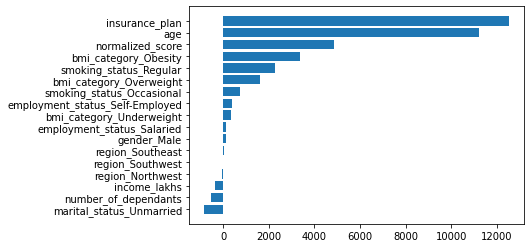

In [374]:
plt.barh(coef_df.index,coef_df['Coefficients'])

In [375]:
# SO here, the features which are highly contributing to the prediction are insurance plan and age

In [376]:
# checking the other metrics like MSE nad RMSE
from sklearn.metrics import mean_squared_error

y_pred=model_lr.predict(X_test)

mse_lr=mean_squared_error(y_test,y_pred)
rmse_lr=np.sqrt(mse_lr)

print("Linear Regression MSE :", mse_lr , "RootMSE :" , rmse_lr)

Linear Regression MSE : 5056639.130347775 RootMSE : 2248.6972073509087


# Lets check OR do same with XGBoost model instead of Linear regerresion

In [377]:
from xgboost import XGBRegressor

model_xgb=XGBRegressor()
model_xgb.fit(X_train,y_train)

train_score_xgb=model_xgb.score(X_train,y_train)

test_score_xgb=model_xgb.score(X_test,y_test)


y_pred=model_xgb.predict(X_test)

mse_xgb=mean_squared_error(y_test,y_pred)
rmse_xgb=np.sqrt(mse_xgb)

print("XGBoost MSE :", mse_xgb , "RootMSE :" , rmse_xgb)



train_score_xgb,test_score_xgb


XGBoost MSE : 1357488.75 RootMSE : 1165.1131919260033


(0.9861041903495789, 0.9807721972465515)

In [378]:
#this clearly sees an improvement in RMSE and the accuracy i.e r2 score than in Linear regression.

In [379]:
# Choosing Best Model and assigning it to the variable best_model for conveinence

In [380]:
#  We have seen two models. model_lr and model_xgb , out of which model_xgb is more good in accuracy score,
# sp choosing our best model 

best_model=model_xgb

# ERROR ANALYSIS 

In [381]:
#  Here we see the magnitude of vairation ( or residuals) of predicted y values by model_xgb when X_test is given, v/s actual y_test values
# to check the error percentage

y_pred=best_model.predict(X_test)
residuals=y_pred-y_test

# residuals in percentage 
residuals_pct=(y_pred-y_test)*100/y_test



In [382]:
residuals_pct

24098    -1.620834
201      19.237971
25471   -27.146134
32500    -1.750912
30832     1.419898
           ...    
12123     0.057309
31891     0.719831
6713      0.575225
16957    -0.955217
15109     7.870778
Name: annual_premium_amount, Length: 14973, dtype: float64

Text(0.5, 0, 'residuals_pct')

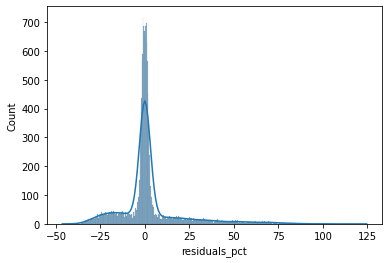

In [383]:
sns.histplot(residuals_pct , kde= True)
plt.xlabel("residuals_pct")

In [384]:
#  SInce the residuals_pct is over and above 10 percent , and going near 80 percent in some cases. this is not
#  a better model to be deplyoed/ The error margin given by business is only upto 10 percent

In [385]:
#  SO we have to analysis of why this is so much error percentage.  SO, how it is found , where the 
# things are going wrong

# Answer A >> visually inspect the histograms of each feature , Ideally the curvature should be same

# if nothing unusual is found then consult business team for more data like genetics, eatinghabbits, excercise or steps a day , and 4
# retrain the model with these data included

In [386]:
#  But first,lets see how many of them are more than 10 percent of errors

results_df=pd.DataFrame({

    'actual' :y_test,
    'predicted':y_pred,
    'diff':residuals,
    'diff_pct':residuals_pct
})


In [387]:
results_df

,actual,predicted,diff,diff_pct
24098,9246,9096.137695,-149.862305,-1.620834
201,11664,13907.916992,2243.916992,19.237971
25471,10472,7629.256836,-2842.743164,-27.146134
32500,26267,25807.087891,-459.912109,-1.750912
30832,9106,9235.295898,129.295898,1.419898
...,...,...,...,...
12123,9529,9534.460938,5.460938,0.057309
31891,14240,14342.503906,102.503906,0.719831
6713,16992,17089.742188,97.742188,0.575225
16957,25620,25375.273438,-244.726562,-0.955217


In [390]:
results_df.shape

(14973, 4)

In [394]:
# making out a df having onyl those rows whos difference percentage is less than acceptable buisness error margin
#  that is 10 percent
extreme_results_threshold=10

extreme_results_df=results_df[np.abs(results_df.diff_pct)>extreme_results_threshold]

In [395]:
extreme_results_df.shape

(4415, 4)

In [400]:
extreme_errors_pct=extreme_results_df.shape[0] *100 / results_df.shape[0]
extreme_errors_pct

29.48640886929807

In [ ]:
# this shiws 30percent of the records are over 10 percent error margin// which is not  acceptable

# Now we need to see which column or feature is causing such high errors
# the difference_percentage seen in results_df is made out of X test data, so we need to see those rows which contriubted to this
# errors



In [401]:
extreme_results_df.index  # this gives the indexes of extreme_results_df rows which where in consideration in , use these in Xtest

Index([  201, 25471, 47939, 26239, 16907, 25369,  8403, 38677, 32319, 21468,
       ...
       41535, 21893, 31047, 10319, 42882, 37321, 49633, 20560, 43822,  7746],
      dtype='int64', length=4415)

In [403]:
extreme_errors_df=X_test.loc[extreme_results_df.index]
extreme_errors_df.shape

(4415, 17)

In [405]:
extreme_errors_df

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
201,0.129630,0.2,0.636364,1.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0
25471,0.074074,0.0,0.010101,0.0,0.0,1,1,0,0,1,0,1,0,0,1,1,0
47939,0.111111,0.0,0.424242,1.0,0.0,0,1,0,0,1,0,0,1,0,0,1,0
26239,0.037037,0.0,0.292929,0.0,0.0,1,1,0,0,1,0,0,1,0,0,0,0
16907,0.111111,0.0,0.606061,0.5,0.0,1,0,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37321,0.018519,0.4,0.171717,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1,0
49633,0.037037,0.0,0.353535,0.5,0.0,0,0,1,0,1,0,0,0,1,0,0,0
20560,0.055556,0.6,0.313131,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0
43822,0.111111,0.2,0.020202,0.0,0.0,0,0,1,0,1,1,0,0,0,0,0,0


In [404]:
#  looking at the df, we will not know the problem, so we need to plot the histogram of each feature of 
# raw data X_test over the histogram of extreme_results_df , this will allow us to see the extreme_results_df data which is
# out of sync with X_test.

<Axes: xlabel='income_lakhs', ylabel='Count'>

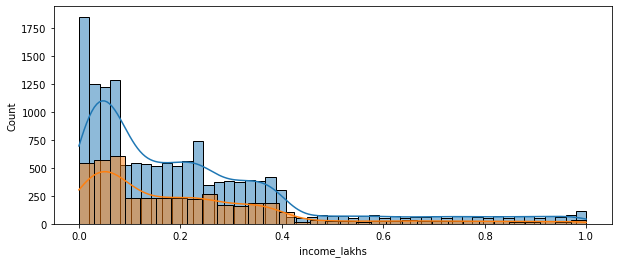

In [407]:
plt.figure(figsize=(10,4))
sns.histplot(X_test.income_lakhs,kde=True)
sns.histplot(extreme_errors_df.income_lakhs,kde=True)

In [ ]:
#  the curvature of both Xtest.income and extremeerrorsdf.income is same, so we dont suspect anything 
# wrong in income column.. similarly we need to check other features as well

In [ ]:
# above plot show only one feature on single chart, we need to each feature separately ploted as done below

In [408]:
X_test.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'normalized_score', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

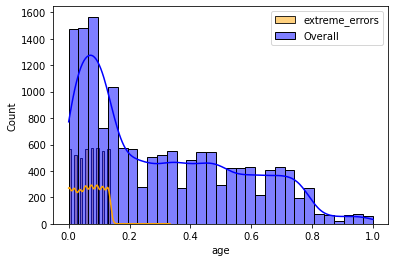

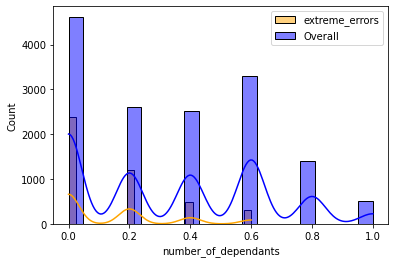

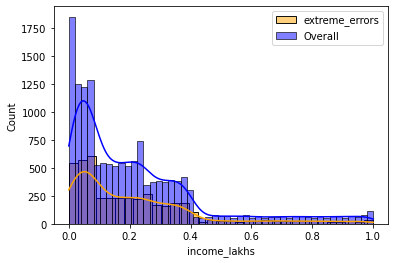

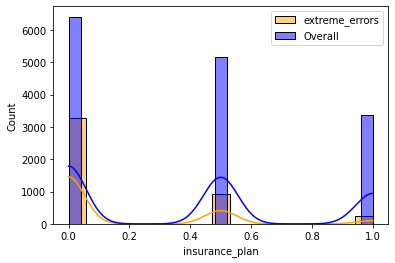

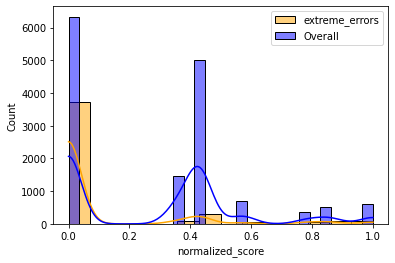

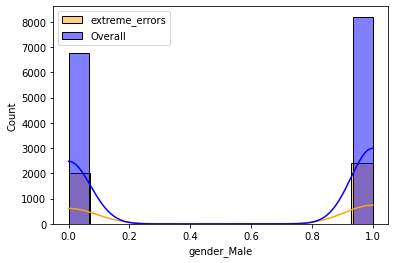

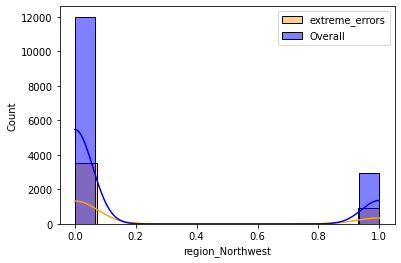

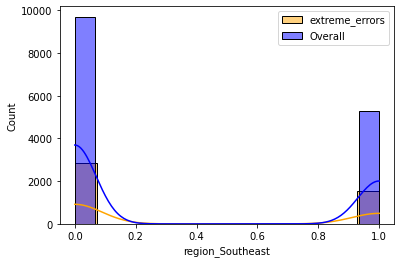

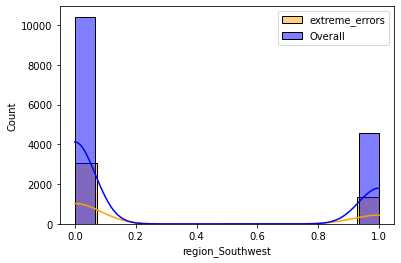

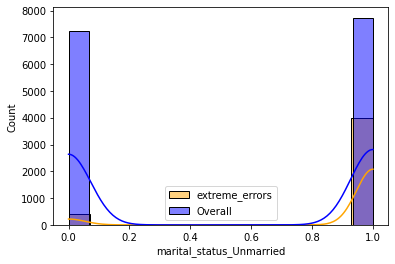

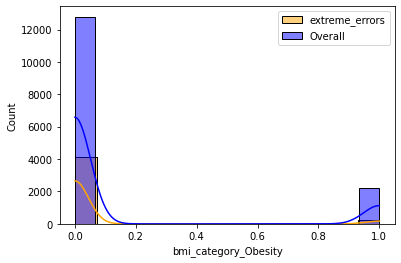

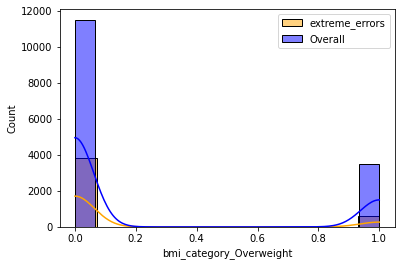

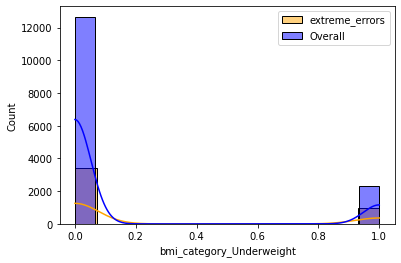

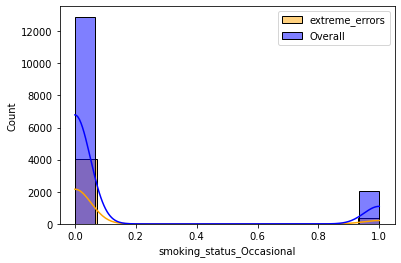

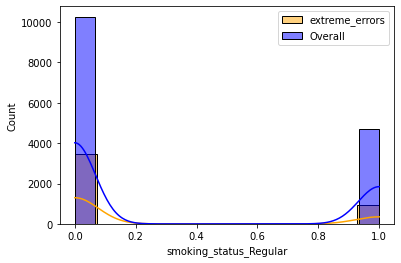

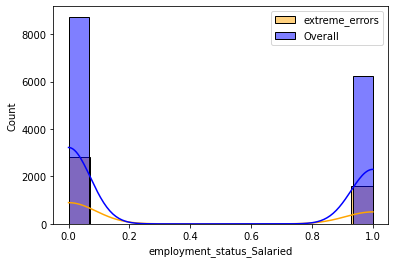

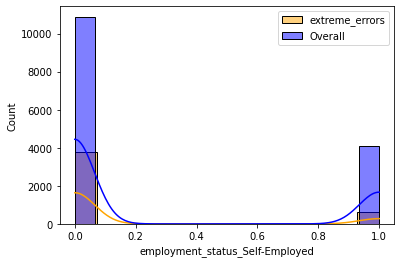

In [409]:
for feature in  X_test.columns:
    sns.histplot(extreme_errors_df[feature], kde=True , label='extreme_errors',color='orange')
    sns.histplot(X_test[feature], kde=True , color='blue' , label ='Overall' , alpha=0.5)
    plt.legend()
    plt.show()

In [417]:
extreme_errors_df['income_level']=None  #this col was removed when doing VIF , but that was used during scaling, and so we are just 
# putting that col back in extreme_errors_df , for our inverse scaling to happen back correctly.

In [420]:
# if u see the age chart , the orange curvature is more for younger ages between 0.0 to 0.2 , which could be the
# root cause for large error percentage.

# all the ages are scaled between 0 to 1 , to just to what ages have this issue, we can reverse the scaled values to actual ones
df_reversed=pd.DataFrame()
df_reversed[cols_to_scale]=scaler.inverse_transform(extreme_errors_df[cols_to_scale])
df_reversed

,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,25.0,1.0,NaN,64.0,3.0
1,22.0,0.0,NaN,2.0,1.0
2,24.0,0.0,NaN,43.0,3.0
3,20.0,0.0,NaN,30.0,1.0
4,24.0,0.0,NaN,61.0,2.0
...,...,...,...,...,...
4410,19.0,2.0,NaN,18.0,1.0
4411,20.0,0.0,NaN,36.0,2.0
4412,21.0,3.0,NaN,32.0,1.0
4413,24.0,1.0,NaN,3.0,1.0


<Axes: xlabel='age', ylabel='Count'>

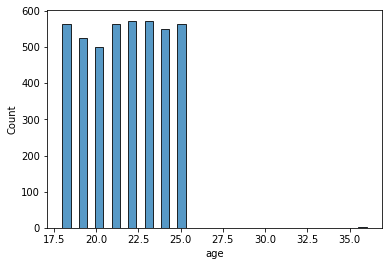

In [421]:
sns.histplot(df_reversed.age)

In [ ]:
# so in above plot, we can see that, uptill 25 we have a problem from about 18 to 25/

In [423]:
df_reversed['age'].quantile(0.97)

np.float64(25.0)

In [ ]:
#  the above number from quantile shows that, 97 percent of records of extreme errors are aged 25 and below.
# so, in that age group there is some issue, and it needs further attention

In [ ]:
# either we can remove the data of age group < 25 , or we can have separate models for ages<25 and ages>25